In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from catboost import CatBoostClassifier, CatBoostRegressor

In [274]:
# using dataset without imputations
df = pd.read_csv('data/Dementia_ISRID2_Hanna_2017_Clean_For_R_v2_Dec8_edited.csv', encoding = "ISO-8859-1", index_col=0)

In [276]:
df['IPP Coord. ']

Incident #
1                    NaN
2                    NaN
3                    NaN
4       VicRoads 254 D11
5              Map 16 F3
              ...       
3272                 NaN
3273                 NaN
3274             953/774
3275                 NaN
3276                 NaN
Name: IPP Coord. , Length: 3275, dtype: object

In [55]:
df = df.dropna(thresh=len(df) * 0.7, axis=1) # remove all columns with more than 70% of the values missing

In [56]:
df

,Data Source,Country,State/Province/Region,Incident Date Time,Incident Year,Incident Month,Incident Day,County,EcoRegion Domain,Subject Category,Group Type,# Lost,Age,Sex,Subject Status,Search hours,TTL Hours,Distance IPP (km)
Incident #,,,,,,,,,,,,,,,,,,
1,PLI,US,VA,7/28/2004,2004.0,7.0,28.0,VA,Temperate,Demenita,M,1.0,NaN,M,Well,0.014583333,0.035416666,0.396241
2,AU,AU,NaN,9/30/2000,2000.0,9.0,30.0,SA,Dry,Dementia,M,1.0,71.0,M,DOA,NaN,0,NaN
3,AU,AU,NaN,1/7/2000,2000.0,1.0,7.0,QLD,Temperate,Dementia,M,1.0,80.0,M,Injured,NaN,0.270833333,NaN
4,AU,AU,NaN,11/15/2001,2001.0,11.0,15.0,VIC,Temperate,Dementia,M,1.0,70.0,M,Well,NaN,0.263888875,6.000000
5,AU,AU,NaN,10/9/2000,2000.0,10.0,9.0,VIC,Temperate,Dementia,M,1.0,88.0,M,Injured,NaN,0.861805417,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,PLI,US,VA,7/16/2004,2004.0,7.0,16.0,VA,Temperate,Demential,M,1.0,52.0,M,Well,0.000694444,0.021527777,4.828041
3273,US,US,VA,7/27/2004,2004.0,7.0,27.0,VA,Temperate,Demential,M,1.0,52.0,M,Well,0.013194444,0.034027777,0.396241
3274,NZ,NZ,NaN,2/14/2004,2004.0,2.0,14.0,Bay of Plenty,Temperate,Dementia,F,1.0,70.0,F,Well,0.104166667,0.135416667,0.500000


In [6]:
df.columns

Index(['Data Source', 'Country', 'State/Province/Region', 'Incident Date Time',
       'Incident Year', 'Incident Month', 'Incident Day', 'County',
       'EcoRegion Domain', 'Subject Category', 'Group Type', '# Lost', 'Age',
       'Sex', 'Subject Status', 'Search hours', 'TTL Hours',
       'Distance IPP (km)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 1 to 3276
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data Source            3275 non-null   object 
 1   Country                3275 non-null   object 
 2   State/Province/Region  2452 non-null   object 
 3   Incident Date Time     2473 non-null   object 
 4   Incident Year          2473 non-null   float64
 5   Incident Month         2473 non-null   float64
 6   Incident Day           2473 non-null   float64
 7   County                 2798 non-null   object 
 8   EcoRegion Domain       3274 non-null   object 
 9   Subject Category       3275 non-null   object 
 10  Group Type             2654 non-null   object 
 11  # Lost                 2857 non-null   float64
 12  Age                    2466 non-null   float64
 13  Sex                    2654 non-null   object 
 14  Subject Status         3153 non-null   object 
 15  Sear

In [57]:
df.describe()

,Incident Year,Incident Month,Incident Day,# Lost,Age,Distance IPP (km)
count,2473.000000,2473.000000,2473.000000,2857.000000,2466.000000,2392.000000
mean,2004.363122,6.669228,15.124949,1.001750,75.667478,3.080007
std,12.796103,3.239960,8.718039,0.056109,10.234875,9.592976
min,1904.000000,1.000000,1.000000,0.000000,16.000000,0.000000
25%,2003.000000,4.000000,8.000000,1.000000,71.000000,0.396241
50%,2006.000000,7.000000,15.000000,1.000000,78.000000,1.000000
75%,2010.000000,9.000000,22.000000,1.000000,82.000000,3.006828
max,2014.000000,12.000000,31.000000,2.000000,98.000000,316.895072


In [58]:
df.describe(include='object')

,Data Source,Country,State/Province/Region,Incident Date Time,County,EcoRegion Domain,Subject Category,Group Type,Sex,Subject Status,Search hours,TTL Hours
count,3275,3275,2452,2473,2798,3274,3275,2654,2654,3153,2642,3275
unique,35,7,50,1792,311,4,10,5,3,9,562,838
top,PLI,US,VA,7/5/1905,VA,Temperate,Dementia,M,M,Well,0.000694444,0
freq,940,2177,986,27,842,3100,3256,1813,1832,2428,155,388


In [59]:
df['Sex'].unique()

array(['M', 'F', nan, 'Transgender'], dtype=object)

In [60]:
df[df['Subject Status']=='DOA']

,Data Source,Country,State/Province/Region,Incident Date Time,Incident Year,Incident Month,Incident Day,County,EcoRegion Domain,Subject Category,Group Type,# Lost,Age,Sex,Subject Status,Search hours,TTL Hours,Distance IPP (km)
Incident #,,,,,,,,,,,,,,,,,,
2,AU,AU,NaN,9/30/2000,2000.0,9.0,30.0,SA,Dry,Dementia,M,1.0,71.0,M,DOA,NaN,0,NaN
32,AU,AU,NaN,9/23/2003,2003.0,9.0,23.0,WA,Temperate,Dementia,F,1.0,86.0,F,DOA,NaN,0.25,0.300000
43,AU,AU,NaN,11/10/2003,2003.0,11.0,10.0,NSW,Temperate,Dementia,F,1.0,69.0,F,DOA,NaN,0,NaN
47,AU,AU,NaN,5/14/2003,2003.0,5.0,14.0,NSW,Temperate,Dementia,F,1.0,84.0,F,DOA,NaN,2.875,NaN
63,AU,AU,NaN,11/5/2004,2004.0,11.0,5.0,VIC,Temperate,Dementia,F,1.0,89.0,F,DOA,NaN,0.483333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,US-MD,US,MD,2/16/2006,2006.0,2.0,16.0,NaN,Temperate,Dementia,F,1.0,92.0,F,DOA,13:30,1.416666667,0.152000
3231,US-MD,US,MD,2/8/2013,2013.0,2.0,8.0,NaN,Temperate,Dementia,M,1.0,70.0,M,DOA,2:30,0.375,NaN
3239,US-GA,US,GA,6/3/1994,1994.0,6.0,3.0,Carroll,Temperate,Dementia,M,1.0,67.0,M,DOA,633.1458333,633.2291666,0.928222


In [61]:
# standardizing and preprocessing
df.loc[df['Subject Status']=='No trace','Subject Status'] = 'No Trace'
df.loc[df['Subject Status']=='Injuired','Subject Status'] = 'Injured'
df.loc[df['Subject Status']=='Injured/unconscious','Subject Status'] = 'Injured'
df.loc[df['Subject Status']=='DOA,Injured','Subject Status'] = 'DOA'
df['Subject Status'] = df['Subject Status'].astype('category')
df['EcoRegion Domain'] = df['EcoRegion Domain'].astype('category')


C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Michael\AppData\Local\Temp/ipykernel_9024/272482312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject Status'] = df['Subject Status'].astype('category')
C:\Users\Michael\AppData\Local\Temp/ipykernel_9024/272482312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [62]:
df.loc[df['TTL Hours'] == '#VALUE!'] = np.nan
df['TTL Hours'] = df['TTL Hours'].astype(float)

C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Michael\AppData\Local\Temp/ipykernel_9024/61478914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TTL Hours'] = df['TTL Hours'].astype(float)


In [63]:
df['Subject Status'].value_counts()

Well        2424
Injured      439
DOA          154
Alive        105
No Trace      26
Name: Subject Status, dtype: int64

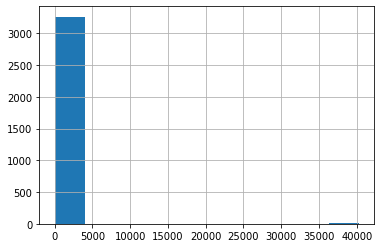

In [64]:
df['TTL Hours'].hist();#.plot()#.hist(figsize=(20,20));

In [65]:
# df[(df['Search hours'].str.contains(':')) & ~(df['Search hours'].isna())]

## Predicting TTL Hours

In [273]:
df1['TTL Hours'].describe()

count     3268.000000
mean        62.472025
std       1565.037657
min          0.000000
25%          0.022222
50%          0.041667
75%          0.187500
max      40300.739580
Name: TTL Hours, dtype: float64

In [272]:
df1 = df[['EcoRegion Domain','Age','Sex','TTL Hours']]

In [207]:
df1['Age'].fillna((df1['Age'].mean()),inplace=True)
df1['Sex'].fillna(df1['Sex'].mode()[0],inplace=True)
df1['EcoRegion Domain'].fillna(df1['EcoRegion Domain'].mode()[0],inplace=True)

X = df1[['EcoRegion Domain','Age','Sex']]
y = df1['TTL Hours'].fillna(df1['TTL Hours'].mean())

C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [208]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [209]:
# Initialize CatBoostRegressor
regr = CatBoostRegressor(iterations=500,cat_features=[0,2])
# Fit model
regr.fit(X_train, y_train)
# Get predictions
preds = regr.predict(X_test)

Learning rate set to 0.082003
0:	learn: 1452.7968659	total: 28.5ms	remaining: 14.2s
1:	learn: 1452.7535664	total: 53.5ms	remaining: 13.3s
2:	learn: 1452.5444814	total: 106ms	remaining: 17.6s
3:	learn: 1452.5444813	total: 116ms	remaining: 14.4s


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

4:	learn: 1452.1863062	total: 189ms	remaining: 18.7s
5:	learn: 1452.1484674	total: 207ms	remaining: 17.1s
6:	learn: 1451.8853654	total: 268ms	remaining: 18.9s
7:	learn: 1451.8495501	total: 319ms	remaining: 19.6s
8:	learn: 1451.6924492	total: 361ms	remaining: 19.7s
9:	learn: 1451.6286839	total: 411ms	remaining: 20.1s
10:	learn: 1451.6078842	total: 442ms	remaining: 19.6s
11:	learn: 1451.4780627	total: 513ms	remaining: 20.9s
12:	learn: 1451.4394009	total: 583ms	remaining: 21.9s
13:	learn: 1451.4261924	total: 622ms	remaining: 21.6s
14:	learn: 1451.4218142	total: 664ms	remaining: 21.5s
15:	learn: 1451.4087220	total: 682ms	remaining: 20.6s
16:	learn: 1451.3846370	total: 751ms	remaining: 21.3s
17:	learn: 1451.3217758	total: 780ms	remaining: 20.9s
18:	learn: 1451.3188776	total: 843ms	remaining: 21.3s
19:	learn: 1451.3045157	total: 914ms	remaining: 21.9s
20:	learn: 1451.3025042	total: 933ms	remaining: 21.3s
21:	learn: 1451.2597843	total: 964ms	remaining: 20.9s
22:	learn: 1450.9546092	total: 1.0

158:	learn: 1444.4065917	total: 8.52s	remaining: 18.3s
159:	learn: 1444.3890905	total: 8.57s	remaining: 18.2s
160:	learn: 1444.3451918	total: 8.62s	remaining: 18.1s
161:	learn: 1444.3143955	total: 8.67s	remaining: 18.1s
162:	learn: 1444.2249893	total: 8.72s	remaining: 18s
163:	learn: 1444.1488038	total: 8.78s	remaining: 18s
164:	learn: 1444.1452415	total: 8.82s	remaining: 17.9s
165:	learn: 1443.7282614	total: 8.88s	remaining: 17.9s
166:	learn: 1443.6720198	total: 8.94s	remaining: 17.8s
167:	learn: 1443.2512825	total: 9.02s	remaining: 17.8s
168:	learn: 1442.6590178	total: 9.07s	remaining: 17.8s
169:	learn: 1442.6501829	total: 9.12s	remaining: 17.7s
170:	learn: 1442.6453386	total: 9.17s	remaining: 17.6s
171:	learn: 1442.6426902	total: 9.22s	remaining: 17.6s
172:	learn: 1442.0963366	total: 9.27s	remaining: 17.5s
173:	learn: 1442.0944043	total: 9.32s	remaining: 17.5s
174:	learn: 1442.0231720	total: 9.37s	remaining: 17.4s
175:	learn: 1441.9914498	total: 9.43s	remaining: 17.4s
176:	learn: 14

310:	learn: 1440.2801092	total: 16s	remaining: 9.74s
311:	learn: 1440.2714362	total: 16.1s	remaining: 9.69s
312:	learn: 1440.2713269	total: 16.1s	remaining: 9.64s
313:	learn: 1440.2642489	total: 16.2s	remaining: 9.58s
314:	learn: 1440.2639423	total: 16.2s	remaining: 9.53s
315:	learn: 1439.4640368	total: 16.3s	remaining: 9.48s
316:	learn: 1439.4631457	total: 16.3s	remaining: 9.43s
317:	learn: 1439.4487923	total: 16.4s	remaining: 9.38s
318:	learn: 1439.4481541	total: 16.4s	remaining: 9.33s
319:	learn: 1439.4478934	total: 16.5s	remaining: 9.27s
320:	learn: 1439.4370950	total: 16.5s	remaining: 9.22s
321:	learn: 1439.4369565	total: 16.6s	remaining: 9.17s
322:	learn: 1439.4367267	total: 16.6s	remaining: 9.11s
323:	learn: 1439.4360448	total: 16.7s	remaining: 9.05s
324:	learn: 1439.4132405	total: 16.7s	remaining: 9s
325:	learn: 1439.4130530	total: 16.8s	remaining: 8.94s
326:	learn: 1439.4130078	total: 16.8s	remaining: 8.89s
327:	learn: 1439.4048215	total: 16.8s	remaining: 8.84s
328:	learn: 143

464:	learn: 1438.4515018	total: 23.7s	remaining: 1.79s
465:	learn: 1438.4512665	total: 23.8s	remaining: 1.74s
466:	learn: 1438.4511575	total: 23.8s	remaining: 1.68s
467:	learn: 1438.4510551	total: 23.9s	remaining: 1.63s
468:	learn: 1438.4497356	total: 23.9s	remaining: 1.58s
469:	learn: 1438.4448884	total: 24s	remaining: 1.53s
470:	learn: 1438.4447982	total: 24s	remaining: 1.48s
471:	learn: 1438.4447724	total: 24.1s	remaining: 1.43s
472:	learn: 1438.4447113	total: 24.1s	remaining: 1.38s
473:	learn: 1438.3994409	total: 24.2s	remaining: 1.33s
474:	learn: 1438.3091376	total: 24.2s	remaining: 1.27s
475:	learn: 1438.2705944	total: 24.3s	remaining: 1.22s
476:	learn: 1438.2658045	total: 24.3s	remaining: 1.17s
477:	learn: 1438.2636415	total: 24.4s	remaining: 1.12s
478:	learn: 1438.2635465	total: 24.5s	remaining: 1.07s
479:	learn: 1438.2634806	total: 24.6s	remaining: 1.02s
480:	learn: 1437.8999015	total: 24.7s	remaining: 974ms
481:	learn: 1437.8998873	total: 24.7s	remaining: 923ms
482:	learn: 14

In [210]:
mean_absolute_error(y_test,preds)

205.081463598138

In [211]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Age,48.975909
1,EcoRegion Domain,33.337410
2,Sex,17.686681


In [212]:
scores = cross_val_score(regr, X, y, cv=4, scoring = 'neg_mean_absolute_error')

Learning rate set to 0.082904
0:	learn: 1801.6787794	total: 66.6ms	remaining: 33.2s
1:	learn: 1800.6513362	total: 119ms	remaining: 29.7s
2:	learn: 1796.6262501	total: 193ms	remaining: 32s
3:	learn: 1793.0298880	total: 262ms	remaining: 32.5s
4:	learn: 1790.2301754	total: 317ms	remaining: 31.4s
5:	learn: 1789.9580467	total: 367ms	remaining: 30.2s
6:	learn: 1787.5697462	total: 423ms	remaining: 29.8s
7:	learn: 1785.5001158	total: 486ms	remaining: 29.9s
8:	learn: 1783.2850413	total: 535ms	remaining: 29.2s
9:	learn: 1780.3748985	total: 608ms	remaining: 29.8s
10:	learn: 1778.4006248	total: 688ms	remaining: 30.6s
11:	learn: 1774.8522264	total: 762ms	remaining: 31s
12:	learn: 1770.4464527	total: 848ms	remaining: 31.8s
13:	learn: 1770.3704540	total: 932ms	remaining: 32.4s
14:	learn: 1770.3686934	total: 967ms	remaining: 31.3s
15:	learn: 1770.1979639	total: 1.07s	remaining: 32.5s
16:	learn: 1768.4484560	total: 1.17s	remaining: 33.3s
17:	learn: 1767.5351711	total: 1.24s	remaining: 33.3s
18:	learn: 

154:	learn: 1676.8944372	total: 9.62s	remaining: 21.4s
155:	learn: 1674.1264274	total: 9.71s	remaining: 21.4s
156:	learn: 1674.0305125	total: 9.8s	remaining: 21.4s
157:	learn: 1671.4480847	total: 9.9s	remaining: 21.4s
158:	learn: 1671.3082212	total: 9.99s	remaining: 21.4s
159:	learn: 1671.0330468	total: 10.1s	remaining: 21.4s
160:	learn: 1670.9632320	total: 10.1s	remaining: 21.3s
161:	learn: 1670.8378998	total: 10.2s	remaining: 21.2s
162:	learn: 1670.4769104	total: 10.2s	remaining: 21.1s
163:	learn: 1670.3930845	total: 10.3s	remaining: 21s
164:	learn: 1667.8726833	total: 10.3s	remaining: 20.9s
165:	learn: 1667.8008904	total: 10.4s	remaining: 20.9s
166:	learn: 1667.7373264	total: 10.4s	remaining: 20.8s
167:	learn: 1667.6899636	total: 10.5s	remaining: 20.7s
168:	learn: 1667.1571110	total: 10.5s	remaining: 20.6s
169:	learn: 1667.0982450	total: 10.6s	remaining: 20.5s
170:	learn: 1667.0570366	total: 10.6s	remaining: 20.4s
171:	learn: 1664.6446669	total: 10.7s	remaining: 20.3s
172:	learn: 16

304:	learn: 1636.2138176	total: 19.8s	remaining: 12.7s
305:	learn: 1636.2029976	total: 19.9s	remaining: 12.6s
306:	learn: 1636.1991062	total: 19.9s	remaining: 12.5s
307:	learn: 1635.9294819	total: 20s	remaining: 12.5s
308:	learn: 1634.8778389	total: 20.1s	remaining: 12.4s
309:	learn: 1634.8139353	total: 20.1s	remaining: 12.3s
310:	learn: 1634.8072071	total: 20.2s	remaining: 12.3s
311:	learn: 1634.6574255	total: 20.3s	remaining: 12.2s
312:	learn: 1634.4457273	total: 20.4s	remaining: 12.2s
313:	learn: 1634.3881269	total: 20.5s	remaining: 12.2s
314:	learn: 1634.3797256	total: 20.6s	remaining: 12.1s
315:	learn: 1634.2082627	total: 20.7s	remaining: 12.1s
316:	learn: 1634.0205700	total: 20.8s	remaining: 12s
317:	learn: 1634.0187836	total: 20.9s	remaining: 12s
318:	learn: 1633.7863207	total: 20.9s	remaining: 11.9s
319:	learn: 1633.7394069	total: 21s	remaining: 11.8s
320:	learn: 1633.7300356	total: 21.1s	remaining: 11.7s
321:	learn: 1633.7239813	total: 21.1s	remaining: 11.7s
322:	learn: 1633.7

457:	learn: 1615.6600672	total: 30s	remaining: 2.75s
458:	learn: 1615.4642174	total: 30.1s	remaining: 2.69s
459:	learn: 1615.4609240	total: 30.1s	remaining: 2.62s
460:	learn: 1615.4589923	total: 30.2s	remaining: 2.55s
461:	learn: 1615.3358494	total: 30.3s	remaining: 2.49s
462:	learn: 1615.1662319	total: 30.3s	remaining: 2.42s
463:	learn: 1615.1614914	total: 30.3s	remaining: 2.35s
464:	learn: 1614.7229065	total: 30.4s	remaining: 2.29s
465:	learn: 1614.3384859	total: 30.4s	remaining: 2.22s
466:	learn: 1613.8923000	total: 30.5s	remaining: 2.15s
467:	learn: 1613.8917671	total: 30.5s	remaining: 2.09s
468:	learn: 1613.8897054	total: 30.6s	remaining: 2.02s
469:	learn: 1613.5436373	total: 30.6s	remaining: 1.96s
470:	learn: 1613.5414337	total: 30.7s	remaining: 1.89s
471:	learn: 1613.2222080	total: 30.8s	remaining: 1.82s
472:	learn: 1613.2217024	total: 30.8s	remaining: 1.76s
473:	learn: 1612.8170179	total: 30.9s	remaining: 1.7s
474:	learn: 1612.5211817	total: 31s	remaining: 1.63s
475:	learn: 161

110:	learn: 1708.4512770	total: 4.04s	remaining: 14.2s
111:	learn: 1707.3865255	total: 4.08s	remaining: 14.2s
112:	learn: 1706.5829468	total: 4.14s	remaining: 14.2s
113:	learn: 1705.7056355	total: 4.2s	remaining: 14.2s
114:	learn: 1704.6341407	total: 4.25s	remaining: 14.2s
115:	learn: 1704.1788787	total: 4.31s	remaining: 14.3s
116:	learn: 1704.0435383	total: 4.36s	remaining: 14.3s
117:	learn: 1701.5181308	total: 4.41s	remaining: 14.3s
118:	learn: 1700.8187145	total: 4.46s	remaining: 14.3s
119:	learn: 1700.6402759	total: 4.5s	remaining: 14.2s
120:	learn: 1699.4605360	total: 4.55s	remaining: 14.2s
121:	learn: 1698.6082194	total: 4.59s	remaining: 14.2s
122:	learn: 1697.9529966	total: 4.63s	remaining: 14.2s
123:	learn: 1697.0596618	total: 4.67s	remaining: 14.2s
124:	learn: 1696.9573161	total: 4.71s	remaining: 14.1s
125:	learn: 1696.8653361	total: 4.74s	remaining: 14.1s
126:	learn: 1696.7818690	total: 4.77s	remaining: 14s
127:	learn: 1696.1859693	total: 4.81s	remaining: 14s
128:	learn: 1696

263:	learn: 1669.4832977	total: 11.6s	remaining: 10.4s
264:	learn: 1667.8084493	total: 11.6s	remaining: 10.3s
265:	learn: 1666.2528121	total: 11.7s	remaining: 10.3s
266:	learn: 1664.8077643	total: 11.7s	remaining: 10.2s
267:	learn: 1663.4653141	total: 11.7s	remaining: 10.2s
268:	learn: 1663.4405517	total: 11.8s	remaining: 10.1s
269:	learn: 1663.4190328	total: 11.8s	remaining: 10.1s
270:	learn: 1663.3820871	total: 11.9s	remaining: 10s
271:	learn: 1662.1318486	total: 11.9s	remaining: 10s
272:	learn: 1660.9704510	total: 12s	remaining: 9.96s
273:	learn: 1660.9521768	total: 12s	remaining: 9.92s
274:	learn: 1660.7747348	total: 12.1s	remaining: 9.88s
275:	learn: 1658.4548578	total: 12.1s	remaining: 9.84s
276:	learn: 1656.2574975	total: 12.2s	remaining: 9.8s
277:	learn: 1656.2505792	total: 12.2s	remaining: 9.77s
278:	learn: 1656.2334661	total: 12.3s	remaining: 9.76s
279:	learn: 1656.2270061	total: 12.4s	remaining: 9.74s
280:	learn: 1654.1386001	total: 12.5s	remaining: 9.72s
281:	learn: 1654.12

414:	learn: 1612.8266956	total: 19.8s	remaining: 4.06s
415:	learn: 1612.8227870	total: 19.9s	remaining: 4.01s
416:	learn: 1612.8210619	total: 19.9s	remaining: 3.96s
417:	learn: 1612.8177235	total: 20s	remaining: 3.92s
418:	learn: 1612.7710366	total: 20s	remaining: 3.87s
419:	learn: 1612.7681433	total: 20.1s	remaining: 3.82s
420:	learn: 1612.6964677	total: 20.1s	remaining: 3.77s
421:	learn: 1612.6939372	total: 20.2s	remaining: 3.73s
422:	learn: 1612.6917689	total: 20.2s	remaining: 3.68s
423:	learn: 1612.2789205	total: 20.2s	remaining: 3.63s
424:	learn: 1612.2768346	total: 20.3s	remaining: 3.58s
425:	learn: 1612.0866018	total: 20.3s	remaining: 3.53s
426:	learn: 1612.0846737	total: 20.4s	remaining: 3.48s
427:	learn: 1611.9985076	total: 20.4s	remaining: 3.44s
428:	learn: 1611.6015113	total: 20.5s	remaining: 3.39s
429:	learn: 1611.5193186	total: 20.6s	remaining: 3.35s
430:	learn: 1611.4562255	total: 20.6s	remaining: 3.3s
431:	learn: 1611.4542418	total: 20.7s	remaining: 3.25s
432:	learn: 161

66:	learn: 1771.4480858	total: 3.1s	remaining: 20.1s
67:	learn: 1771.4056270	total: 3.15s	remaining: 20s
68:	learn: 1771.3767447	total: 3.2s	remaining: 20s
69:	learn: 1771.3766306	total: 3.21s	remaining: 19.7s
70:	learn: 1770.8542016	total: 3.26s	remaining: 19.7s
71:	learn: 1770.8506099	total: 3.34s	remaining: 19.9s
72:	learn: 1770.6901998	total: 3.37s	remaining: 19.7s
73:	learn: 1770.5668341	total: 3.45s	remaining: 19.8s
74:	learn: 1770.0895374	total: 3.5s	remaining: 19.8s
75:	learn: 1769.9251231	total: 3.54s	remaining: 19.8s
76:	learn: 1769.9248922	total: 3.58s	remaining: 19.7s
77:	learn: 1768.9334047	total: 3.64s	remaining: 19.7s
78:	learn: 1768.9332330	total: 3.68s	remaining: 19.6s
79:	learn: 1768.9267426	total: 3.73s	remaining: 19.6s
80:	learn: 1768.9266146	total: 3.76s	remaining: 19.4s
81:	learn: 1768.9264509	total: 3.78s	remaining: 19.3s
82:	learn: 1768.8826102	total: 3.84s	remaining: 19.3s
83:	learn: 1768.8618136	total: 3.89s	remaining: 19.3s
84:	learn: 1768.4831858	total: 3.94

219:	learn: 1715.4429004	total: 10.6s	remaining: 13.5s
220:	learn: 1715.4328861	total: 10.7s	remaining: 13.5s
221:	learn: 1715.3974430	total: 10.7s	remaining: 13.5s
222:	learn: 1715.1874023	total: 10.8s	remaining: 13.5s
223:	learn: 1714.9921616	total: 10.9s	remaining: 13.4s
224:	learn: 1714.8105916	total: 11s	remaining: 13.4s
225:	learn: 1714.6416556	total: 11s	remaining: 13.4s
226:	learn: 1714.6086111	total: 11.1s	remaining: 13.3s
227:	learn: 1713.3469962	total: 11.1s	remaining: 13.2s
228:	learn: 1713.1938090	total: 11.1s	remaining: 13.2s
229:	learn: 1713.1646568	total: 11.2s	remaining: 13.1s
230:	learn: 1712.9891017	total: 11.2s	remaining: 13.1s
231:	learn: 1712.8277864	total: 11.3s	remaining: 13s
232:	learn: 1711.3279658	total: 11.4s	remaining: 13s
233:	learn: 1711.2893638	total: 11.5s	remaining: 13s
234:	learn: 1711.2653176	total: 11.5s	remaining: 13s
235:	learn: 1711.1520814	total: 11.6s	remaining: 13s
236:	learn: 1711.1305203	total: 11.7s	remaining: 12.9s
237:	learn: 1709.9500679

372:	learn: 1696.9709036	total: 18.9s	remaining: 6.43s
373:	learn: 1695.7572874	total: 18.9s	remaining: 6.38s
374:	learn: 1695.7483883	total: 19s	remaining: 6.33s
375:	learn: 1695.7459982	total: 19s	remaining: 6.27s
376:	learn: 1695.7443634	total: 19.1s	remaining: 6.22s
377:	learn: 1695.7246400	total: 19.1s	remaining: 6.17s
378:	learn: 1695.7232375	total: 19.2s	remaining: 6.12s
379:	learn: 1695.7179140	total: 19.2s	remaining: 6.08s
380:	learn: 1695.3222126	total: 19.3s	remaining: 6.03s
381:	learn: 1695.3182834	total: 19.4s	remaining: 5.99s
382:	learn: 1695.0961161	total: 19.5s	remaining: 5.95s
383:	learn: 1695.0925475	total: 19.5s	remaining: 5.89s
384:	learn: 1694.9669716	total: 19.5s	remaining: 5.84s
385:	learn: 1694.9608059	total: 19.6s	remaining: 5.78s
386:	learn: 1694.9594077	total: 19.6s	remaining: 5.73s
387:	learn: 1694.9543464	total: 19.7s	remaining: 5.68s
388:	learn: 1694.9533364	total: 19.7s	remaining: 5.63s
389:	learn: 1694.9524683	total: 19.8s	remaining: 5.57s
390:	learn: 16

25:	learn: 7.5538404	total: 1.14s	remaining: 20.7s
26:	learn: 7.5538404	total: 1.15s	remaining: 20.2s
27:	learn: 7.5535889	total: 1.23s	remaining: 20.7s
28:	learn: 7.5535830	total: 1.26s	remaining: 20.4s
29:	learn: 7.5535830	total: 1.27s	remaining: 19.9s
30:	learn: 7.5535724	total: 1.3s	remaining: 19.7s
31:	learn: 7.5484232	total: 1.36s	remaining: 19.8s
32:	learn: 7.5478387	total: 1.4s	remaining: 19.9s
33:	learn: 7.5409785	total: 1.45s	remaining: 19.9s
34:	learn: 7.5349681	total: 1.5s	remaining: 19.9s
35:	learn: 7.5269635	total: 1.56s	remaining: 20.1s
36:	learn: 7.5269634	total: 1.56s	remaining: 19.6s
37:	learn: 7.5233563	total: 1.61s	remaining: 19.6s
38:	learn: 7.5233133	total: 1.65s	remaining: 19.5s
39:	learn: 7.5233118	total: 1.66s	remaining: 19.1s
40:	learn: 7.5232399	total: 1.71s	remaining: 19.2s
41:	learn: 7.5232399	total: 1.73s	remaining: 18.9s
42:	learn: 7.5231507	total: 1.78s	remaining: 18.9s
43:	learn: 7.5231454	total: 1.82s	remaining: 18.8s
44:	learn: 7.5231409	total: 1.86s	

186:	learn: 7.4497731	total: 8.36s	remaining: 14s
187:	learn: 7.4481854	total: 8.44s	remaining: 14s
188:	learn: 7.4481694	total: 8.5s	remaining: 14s
189:	learn: 7.4481687	total: 8.54s	remaining: 13.9s
190:	learn: 7.4476497	total: 8.59s	remaining: 13.9s
191:	learn: 7.4476365	total: 8.65s	remaining: 13.9s
192:	learn: 7.4471720	total: 8.73s	remaining: 13.9s
193:	learn: 7.4471612	total: 8.8s	remaining: 13.9s
194:	learn: 7.4470628	total: 8.87s	remaining: 13.9s
195:	learn: 7.4456617	total: 8.92s	remaining: 13.8s
196:	learn: 7.4452164	total: 8.97s	remaining: 13.8s
197:	learn: 7.4448179	total: 9.06s	remaining: 13.8s
198:	learn: 7.4447763	total: 9.11s	remaining: 13.8s
199:	learn: 7.4444196	total: 9.16s	remaining: 13.7s
200:	learn: 7.4429251	total: 9.22s	remaining: 13.7s
201:	learn: 7.4429136	total: 9.27s	remaining: 13.7s
202:	learn: 7.4428795	total: 9.32s	remaining: 13.6s
203:	learn: 7.4428688	total: 9.39s	remaining: 13.6s
204:	learn: 7.4428683	total: 9.45s	remaining: 13.6s
205:	learn: 7.442525

346:	learn: 7.3971250	total: 20.1s	remaining: 8.85s
347:	learn: 7.3938924	total: 20.1s	remaining: 8.79s
348:	learn: 7.3915445	total: 20.2s	remaining: 8.73s
349:	learn: 7.3915416	total: 20.2s	remaining: 8.67s
350:	learn: 7.3889679	total: 20.3s	remaining: 8.61s
351:	learn: 7.3887645	total: 20.3s	remaining: 8.55s
352:	learn: 7.3884428	total: 20.4s	remaining: 8.51s
353:	learn: 7.3861451	total: 20.5s	remaining: 8.47s
354:	learn: 7.3854914	total: 20.6s	remaining: 8.42s
355:	learn: 7.3849477	total: 20.7s	remaining: 8.38s
356:	learn: 7.3849442	total: 20.8s	remaining: 8.34s
357:	learn: 7.3846488	total: 20.9s	remaining: 8.3s
358:	learn: 7.3834420	total: 21s	remaining: 8.25s
359:	learn: 7.3831681	total: 21.1s	remaining: 8.2s
360:	learn: 7.3830898	total: 21.2s	remaining: 8.16s
361:	learn: 7.3830864	total: 21.3s	remaining: 8.11s
362:	learn: 7.3830834	total: 21.4s	remaining: 8.06s
363:	learn: 7.3830824	total: 21.4s	remaining: 8.01s
364:	learn: 7.3830777	total: 21.5s	remaining: 7.96s
365:	learn: 7.38

In [213]:
scores.mean()

-135.62482766882488

## Predicting Subject Status

In [214]:
df1 = df[['EcoRegion Domain','Age','Sex','TTL Hours','Subject Status']]
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1['Sex'].fillna(df1['Sex'].mode()[0],inplace=True)
df1['EcoRegion Domain'].fillna(df1['EcoRegion Domain'].mode()[0],inplace=True)
df1['Subject Status'].fillna(df1['Subject Status'].mode()[0],inplace=True)
X = df1[['EcoRegion Domain','Age','Sex']]
y = df1['Subject Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize CatBoostRegressor
clf = CatBoostClassifier(iterations=500)
# Fit model
clf.fit(X_train, y_train,cat_features=[0,2])
# Get predictions
preds = clf.predict(X_test)

C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Learning rate set to 0.148274
0:	learn: 1.3233876	total: 71.5ms	remaining: 35.7s
1:	learn: 1.1677113	total: 124ms	remaining: 31s
2:	learn: 1.0647583	total: 180ms	remaining: 29.8s
3:	learn: 0.9920473	total: 246ms	remaining: 30.5s
4:	learn: 0.9376154	total: 293ms	remaining: 29s
5:	learn: 0.8966085	total: 330ms	remaining: 27.1s
6:	learn: 0.8651549	total: 373ms	remaining: 26.2s
7:	learn: 0.8404388	total: 439ms	remaining: 27s
8:	learn: 0.8213398	total: 515ms	remaining: 28.1s
9:	learn: 0.8061818	total: 558ms	remaining: 27.3s
10:	learn: 0.7941978	total: 621ms	remaining: 27.6s
11:	learn: 0.7847233	total: 653ms	remaining: 26.6s
12:	learn: 0.7771387	total: 682ms	remaining: 25.5s
13:	learn: 0.7711758	total: 706ms	remaining: 24.5s
14:	learn: 0.7664577	total: 728ms	remaining: 23.5s
15:	learn: 0.7627173	total: 759ms	remaining: 22.9s
16:	learn: 0.7595202	total: 797ms	remaining: 22.7s
17:	learn: 0.7571102	total: 847ms	remaining: 22.7s
18:	learn: 0.7550088	total: 909ms	remaining: 23s
19:	learn: 0.75256

161:	learn: 0.6499642	total: 14.2s	remaining: 29.6s
162:	learn: 0.6493970	total: 14.3s	remaining: 29.6s
163:	learn: 0.6491891	total: 14.5s	remaining: 29.6s
164:	learn: 0.6487557	total: 14.6s	remaining: 29.7s
165:	learn: 0.6484824	total: 14.7s	remaining: 29.7s
166:	learn: 0.6482788	total: 14.9s	remaining: 29.6s
167:	learn: 0.6479745	total: 15s	remaining: 29.6s
168:	learn: 0.6475196	total: 15.1s	remaining: 29.6s
169:	learn: 0.6472736	total: 15.3s	remaining: 29.7s
170:	learn: 0.6464966	total: 15.4s	remaining: 29.6s
171:	learn: 0.6461029	total: 15.5s	remaining: 29.6s
172:	learn: 0.6456710	total: 15.7s	remaining: 29.7s
173:	learn: 0.6451232	total: 15.8s	remaining: 29.5s
174:	learn: 0.6446252	total: 15.8s	remaining: 29.4s
175:	learn: 0.6443653	total: 15.9s	remaining: 29.3s
176:	learn: 0.6441189	total: 16.1s	remaining: 29.3s
177:	learn: 0.6434140	total: 16.2s	remaining: 29.3s
178:	learn: 0.6432725	total: 16.3s	remaining: 29.3s
179:	learn: 0.6430874	total: 16.4s	remaining: 29.2s
180:	learn: 0.

322:	learn: 0.5951896	total: 30.8s	remaining: 16.9s
323:	learn: 0.5950130	total: 30.9s	remaining: 16.8s
324:	learn: 0.5947879	total: 30.9s	remaining: 16.6s
325:	learn: 0.5946140	total: 31s	remaining: 16.5s
326:	learn: 0.5940784	total: 31s	remaining: 16.4s
327:	learn: 0.5940033	total: 31.1s	remaining: 16.3s
328:	learn: 0.5933707	total: 31.2s	remaining: 16.2s
329:	learn: 0.5931775	total: 31.2s	remaining: 16.1s
330:	learn: 0.5929662	total: 31.3s	remaining: 16s
331:	learn: 0.5927569	total: 31.4s	remaining: 15.9s
332:	learn: 0.5925201	total: 31.5s	remaining: 15.8s
333:	learn: 0.5921951	total: 31.6s	remaining: 15.7s
334:	learn: 0.5917077	total: 31.6s	remaining: 15.6s
335:	learn: 0.5915231	total: 31.7s	remaining: 15.5s
336:	learn: 0.5912370	total: 31.8s	remaining: 15.4s
337:	learn: 0.5909959	total: 31.9s	remaining: 15.3s
338:	learn: 0.5908414	total: 31.9s	remaining: 15.2s
339:	learn: 0.5905442	total: 32s	remaining: 15.1s
340:	learn: 0.5902727	total: 32.1s	remaining: 15s
341:	learn: 0.5898185	

484:	learn: 0.5576116	total: 46.2s	remaining: 1.43s
485:	learn: 0.5573365	total: 46.3s	remaining: 1.33s
486:	learn: 0.5570852	total: 46.3s	remaining: 1.24s
487:	learn: 0.5565969	total: 46.4s	remaining: 1.14s
488:	learn: 0.5565326	total: 46.5s	remaining: 1.04s
489:	learn: 0.5564183	total: 46.5s	remaining: 950ms
490:	learn: 0.5560853	total: 46.6s	remaining: 854ms
491:	learn: 0.5559810	total: 46.7s	remaining: 759ms
492:	learn: 0.5557798	total: 46.8s	remaining: 664ms
493:	learn: 0.5556784	total: 46.8s	remaining: 569ms
494:	learn: 0.5555464	total: 46.9s	remaining: 474ms
495:	learn: 0.5554016	total: 47s	remaining: 379ms
496:	learn: 0.5552450	total: 47s	remaining: 284ms
497:	learn: 0.5550182	total: 47.1s	remaining: 189ms
498:	learn: 0.5546023	total: 47.2s	remaining: 94.6ms
499:	learn: 0.5544464	total: 47.3s	remaining: 0us


In [215]:
accuracy_score(y_test,preds)

0.775178026449644

In [216]:
y_test.value_counts()

Well        766
Injured     131
DOA          41
Alive        35
No Trace     10
Name: Subject Status, dtype: int64

In [217]:
confusion_matrix(y_test,preds)

array([[  0,   0,   1,   0,  34],
       [  0,   0,   0,   1,  40],
       [  0,   0,   0,   0, 131],
       [  0,   0,   0,   0,  10],
       [  0,   0,   3,   1, 762]], dtype=int64)

In [218]:
precision_score(y_test,preds,average='weighted')

C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6077649623955244

In [219]:
recall_score(y_test,preds,average='weighted')

0.775178026449644

In [220]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Age,48.975909
1,EcoRegion Domain,33.337410
2,Sex,17.686681


## Creating basic explainable models using Decision Trees

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score, ShuffleSplit
from dtreeviz.trees import *

In [232]:
df1

,EcoRegion Domain,Age,Sex,TTL Hours,Subject Status
Incident #,,,,,
1,Temperate,75.655285,M,0.035417,Well
2,Dry,71.000000,M,0.000000,DOA
3,Temperate,80.000000,M,0.270833,Injured
4,Temperate,70.000000,M,0.263889,Well
5,Temperate,88.000000,M,0.861805,Injured
...,...,...,...,...,...
3272,Temperate,52.000000,M,0.021528,Well
3273,Temperate,52.000000,M,0.034028,Well
3274,Temperate,70.000000,F,0.135417,Well


In [263]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X[['EcoRegion Domain','Sex']])
X_ohe = ohe.transform(df1[['EcoRegion Domain','Sex']]).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
X_ohe = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(X[['EcoRegion Domain','Sex']].columns))

X_ohe.head()

X_ohe['Age'] = X['Age'].reset_index(drop=True)
le = preprocessing.LabelEncoder()
y = le.fit_transform(df1['Subject Status'])

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3, random_state = 42)

In [21]:
# enc = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore').fit(X[['EcoRegion Domain','Sex']])

In [23]:
# # One-hot encode the training data and show the resulting DataFrame with proper column names
# ohe = OneHotEncoder(handle_unknown='ignore')

# ohe.fit(X_train[['EcoRegion Domain','Sex']])
# X_train_ohe = ohe.transform(X_train[['EcoRegion Domain','Sex']]).toarray()

# # Creating this DataFrame is not necessary its only to show the result of the ohe
# X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train[['EcoRegion Domain','Sex']].columns))

# X_train_ohe.head()

# # One-hot encode the training data and show the resulting DataFrame with proper column names
# ohe = OneHotEncoder(handle_unknown='ignore')

# ohe.fit(X_test[['EcoRegion Domain','Sex']])
# X_test_ohe = ohe.transform(X_test[['EcoRegion Domain','Sex']]).toarray()

# # Creating this DataFrame is not necessary its only to show the result of the ohe
# X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(X_test[['EcoRegion Domain','Sex']].columns))


In [103]:
# X_train_ohe['Age'] = X_train['Age'].reset_index(drop=True)
# X_test_ohe['Age'] = X_test['Age'].reset_index(drop=True)

In [246]:
y_train

array([4, 4, 4, ..., 4, 4, 2])

In [265]:
clf = DecisionTreeClassifier(max_depth = 4,random_state=0)
clf.fit(X_train,y_train)
# scores = cross_val_score(regressor, X_ohe, y, cv=3, scoring='')

DecisionTreeClassifier(max_depth=4, random_state=0)

In [266]:
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [267]:
y_pred = clf.predict(X_test)

In [268]:
accuracy_score(y_test,y_pred)

0.7782299084435402

In [269]:
le.inverse_transform(y)

array(['Well', 'DOA', 'Injured', ..., 'Well', 'DOA', 'Well'], dtype=object)

In [270]:
y

array([4, 1, 2, ..., 4, 1, 4])

In [258]:
viz = dtreeviz(regressor,
               X_train,
               y_train,
               target_name='TTL Hours',
               feature_names=X_train.columns)
              
viz.view()

C:\ProgramData\Anaconda3\envs\agewell\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  )


In [49]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

In [50]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mean_absolute_error(y_test,y_pred)

66.18409872133374